In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from scipy.stats import probplot

## 2021년 국민건강보험공단_건강검진정보
- 기준년도
- 가입자 일련번호
- 시도코드
- 성별코드: 남성1, 여성2
- 연령대코드
- 흡연상태: 피우지 않는다 1, 이전에 피웠으나 끊었다 2, 현재도 피우고 있다 3

In [2]:
smoke = pd.read_csv("C:/Users/pc/Desktop/민지/공모전/국민건강보험공단_건강검진정보_20211231.CSV", encoding='CP949')
smoke.drop(['치아우식증유무','결손치유무','치아마모증유무','제3대구치(사랑니)이상', '치석'], axis=1, inplace=True)
smoke.head(5)

,기준년도,가입자 일련번호,시도코드,성별코드,연령대코드(5세 단위),신장(5cm 단위),체중(5kg 단위),허리둘레,시력(좌),시력(우),...,콜레스테롤(LDL),혈색소,요단백,혈청크레아티닌,간기능검사(AST),간기능검사(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부
0,2021,3603281,26,2,9,165,60,83.0,1.0,1.0,...,NaN,14.4,1.0,0.8,23.0,28.0,11.0,1.0,1.0,1
1,2021,1055961,11,1,11,170,70,84.0,0.9,1.0,...,NaN,15.0,1.0,0.9,22.0,24.0,104.0,3.0,0.0,0
2,2021,3237995,43,1,14,170,70,94.0,0.8,0.4,...,122.0,15.5,1.0,0.8,45.0,57.0,191.0,2.0,1.0,0
3,2021,3171504,49,1,11,175,80,95.0,1.2,1.2,...,NaN,16.0,1.0,1.3,30.0,38.0,52.0,3.0,1.0,0
4,2021,4107697,44,2,11,160,70,92.0,1.5,1.5,...,NaN,13.8,1.0,0.6,35.0,30.0,14.0,1.0,0.0,0


In [3]:
smoke['연령대코드(5세 단위)'].unique()

array([ 9, 11, 14, 15, 13, 12, 17, 10, 16, 18], dtype=int64)

### 1. 전처리
1-1. 결측치 처리

In [4]:
#흡연상태가 결측치인 데이터 제외하여 가져오기
smoke= smoke[smoke['흡연상태'].isnull() == False]
smoke

,기준년도,가입자 일련번호,시도코드,성별코드,연령대코드(5세 단위),신장(5cm 단위),체중(5kg 단위),허리둘레,시력(좌),시력(우),...,콜레스테롤(LDL),혈색소,요단백,혈청크레아티닌,간기능검사(AST),간기능검사(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부
0,2021,3603281,26,2,9,165,60,83.0,1.0,1.0,...,NaN,14.4,1.0,0.8,23.0,28.0,11.0,1.0,1.0,1
1,2021,1055961,11,1,11,170,70,84.0,0.9,1.0,...,NaN,15.0,1.0,0.9,22.0,24.0,104.0,3.0,0.0,0
2,2021,3237995,43,1,14,170,70,94.0,0.8,0.4,...,122.0,15.5,1.0,0.8,45.0,57.0,191.0,2.0,1.0,0
3,2021,3171504,49,1,11,175,80,95.0,1.2,1.2,...,NaN,16.0,1.0,1.3,30.0,38.0,52.0,3.0,1.0,0
4,2021,4107697,44,2,11,160,70,92.0,1.5,1.5,...,NaN,13.8,1.0,0.6,35.0,30.0,14.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2021,3120240,45,1,11,155,65,86.0,1.5,1.5,...,68.0,15.6,1.0,0.9,31.0,25.0,47.0,1.0,1.0,0
999996,2021,4905388,47,1,11,160,75,95.0,1.0,0.9,...,99.0,15.7,1.0,0.8,13.0,29.0,124.0,1.0,0.0,0
999997,2021,1472129,45,1,9,170,65,76.0,0.7,1.0,...,NaN,15.1,1.0,1.0,14.0,26.0,24.0,3.0,1.0,0
999998,2021,547327,47,2,13,160,65,88.0,0.7,0.7,...,106.0,13.0,1.0,0.9,30.0,28.0,15.0,1.0,1.0,0


In [5]:
#결측치 확인
smoke.isna().sum()

기준년도                 0
가입자 일련번호             0
시도코드                 0
성별코드                 0
연령대코드(5세 단위)         0
신장(5cm 단위)           0
체중(5kg 단위)           0
허리둘레                91
시력(좌)              209
시력(우)              211
청력(좌)              182
청력(우)              181
수축기 혈압            7430
이완기 혈압            7429
식전혈당(공복혈당)        7507
총 콜레스테롤         573724
트리글리세라이드        573727
콜레스테롤(HDL)      573726
콜레스테롤(LDL)      581296
혈색소               7505
요단백              12651
혈청크레아티닌           7502
간기능검사(AST)        7501
간기능검사(ALT)        7502
감마지티피             7502
흡연상태                 0
음주여부               151
구강검진수검여부             0
dtype: int64

In [6]:
#데이터 개수가 많으므로 결측치가 담긴 행 모두 제거
smoke.dropna(subset=['허리둘레','시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', '콜레스테롤(HDL)', '콜레스테롤(LDL)', '혈색소', '요단백', '혈청크레아티닌', '간기능검사(AST)', '간기능검사(ALT)', '감마지티피', '음주여부'], how='any', inplace=True)

In [7]:
smoke.isna().sum()

기준년도            0
가입자 일련번호        0
시도코드            0
성별코드            0
연령대코드(5세 단위)    0
신장(5cm 단위)      0
체중(5kg 단위)      0
허리둘레            0
시력(좌)           0
시력(우)           0
청력(좌)           0
청력(우)           0
수축기 혈압          0
이완기 혈압          0
식전혈당(공복혈당)      0
총 콜레스테롤         0
트리글리세라이드        0
콜레스테롤(HDL)      0
콜레스테롤(LDL)      0
혈색소             0
요단백             0
혈청크레아티닌         0
간기능검사(AST)      0
간기능검사(ALT)      0
감마지티피           0
흡연상태            0
음주여부            0
구강검진수검여부        0
dtype: int64

In [8]:
#총 40만개 데이터
smoke.shape

(415768, 28)

In [9]:
smoke.info()

<class 'pandas.core.frame.DataFrame'>
Index: 415768 entries, 2 to 999998
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   기준년도          415768 non-null  int64  
 1   가입자 일련번호      415768 non-null  int64  
 2   시도코드          415768 non-null  int64  
 3   성별코드          415768 non-null  int64  
 4   연령대코드(5세 단위)  415768 non-null  int64  
 5   신장(5cm 단위)    415768 non-null  int64  
 6   체중(5kg 단위)    415768 non-null  int64  
 7   허리둘레          415768 non-null  float64
 8   시력(좌)         415768 non-null  float64
 9   시력(우)         415768 non-null  float64
 10  청력(좌)         415768 non-null  float64
 11  청력(우)         415768 non-null  float64
 12  수축기 혈압        415768 non-null  float64
 13  이완기 혈압        415768 non-null  float64
 14  식전혈당(공복혈당)    415768 non-null  float64
 15  총 콜레스테롤       415768 non-null  float64
 16  트리글리세라이드      415768 non-null  float64
 17  콜레스테롤(HDL)    415768 non-null  float64
 18  콜레스테롤(LDL

전부 수치형 데이터로 확인됨

흡연상태
1.0    270932
2.0     73468
3.0     71368
Name: count, dtype: int64


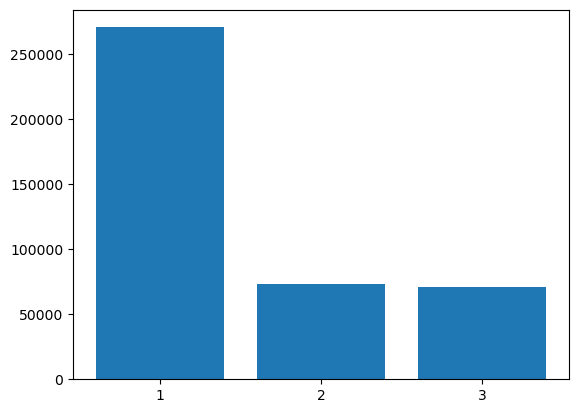

In [10]:
print(smoke['흡연상태'].value_counts()) #index, values

plt.bar(smoke['흡연상태'].value_counts().index, smoke['흡연상태'].value_counts().values)
plt.xticks([1,2,3]) #x축 값 설정
plt.show()

모델이 전부 1로 판단해도 정확도가 0.65가 나올 것임

In [11]:
#흡연상태와 연관성 있어 보이는 것만 뽑기
#기준년도, 가입자 일련번호, 시도코드, 허리둘레, 시력, 청력, 콜레스테롤(LDL), 간기능검사(ALT), 구강검진수검여부 칼럼 제외
smoke2 = smoke.loc[:,['성별코드', '연령대코드(5세 단위)', '신장(5cm 단위)', '체중(5kg 단위)', '수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤','트리글리세라이드', '콜레스테롤(HDL)', '혈색소', '요단백', '혈청크레아티닌', '간기능검사(AST)', '감마지티피', '음주여부','흡연상태']]

In [12]:
smoke2.describe()

,성별코드,연령대코드(5세 단위),신장(5cm 단위),체중(5kg 단위),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,콜레스테롤(HDL),혈색소,요단백,혈청크레아티닌,간기능검사(AST),감마지티피,음주여부,흡연상태
count,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000,415768.000000
mean,1.525596,11.908030,160.747039,62.709997,124.646560,76.434524,103.560649,198.238433,122.979813,57.313204,14.112766,1.125106,0.835146,27.666285,35.778850,0.567215,1.520011
std,0.499345,2.293873,9.181011,12.428561,14.971359,10.132616,24.340232,42.832416,67.114856,16.929027,1.558423,0.495287,0.413048,20.579685,67.046252,0.495462,0.770005
min,1.000000,9.000000,130.000000,30.000000,64.000000,31.000000,26.000000,19.000000,1.000000,1.000000,1.000000,1.000000,0.080000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,10.000000,155.000000,55.000000,115.000000,70.000000,91.000000,169.000000,75.000000,47.000000,13.100000,1.000000,0.700000,20.000000,16.000000,0.000000,1.000000
50%,2.000000,12.000000,160.000000,60.000000,124.000000,76.000000,98.000000,197.000000,106.000000,55.000000,14.100000,1.000000,0.800000,24.000000,23.000000,1.000000,1.000000
75%,2.000000,13.000000,165.000000,70.000000,134.000000,82.000000,109.000000,225.000000,153.000000,66.000000,15.200000,1.000000,1.000000,30.000000,38.000000,1.000000,2.000000
max,2.000000,18.000000,195.000000,135.000000,240.000000,175.000000,925.000000,2406.000000,399.000000,1020.000000,25.000000,6.000000,85.000000,4876.000000,9999.000000,1.000000,3.000000


### 4. 머신러닝

In [13]:
#글씨체 깨짐 방지
plt.rcParams['font.family'] = 'NanumGothic'

In [14]:
#정답과 문제 칼럼 분리
feature_names = smoke2.columns[:-1].tolist()
label_name = smoke2.columns[-1]

In [15]:
#train, test 분리 / 정답과 문제 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(smoke2[feature_names],smoke2[label_name], random_state=42, stratify=smoke2[label_name]) #편향 없애기

In [16]:
print(X_train.shape)
print(y_train.shape) #둘의 행 일치해야

print(X_test.shape)
print(y_test.shape) #둘의 행 일치해야

(311826, 16)
(311826,)
(103942, 16)
(103942,)


4-1. 의사결정나무 (Decision Tree)

In [17]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_predict = model.predict(X_test) #예측

[0.27131829 0.02462004 0.02685554 0.03334566 0.0605176  0.0581143
 0.07019738 0.07620185 0.07625666 0.06328626 0.06084534 0.0075497
 0.03465278 0.05725277 0.06533653 0.01364931]


<Axes: >

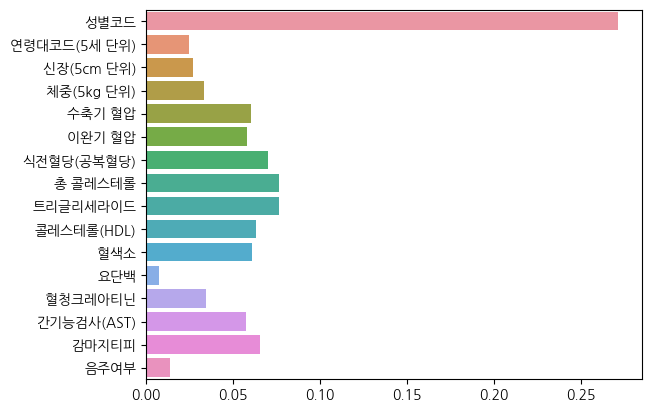

In [18]:
#피처의 중요도 추출
print(model.feature_importances_)
sns.barplot(x=model.feature_importances_, y=feature_names)

성별코드가 압도적으로 중요하게 작용

In [19]:
#정확도 측정
print("훈련 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.643


4-2. 랜덤 포레스트

In [20]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=5, random_state=42)
forest.fit(X_train, y_train)

y_predict = forest.predict(X_test) #예측

[0.09209252 0.03391202 0.14023213 0.03974926 0.0619344  0.05882696
 0.06537248 0.07222451 0.0739351  0.0643917  0.09236413 0.00826322
 0.04987925 0.0592257  0.07263409 0.01496253]


<Axes: >

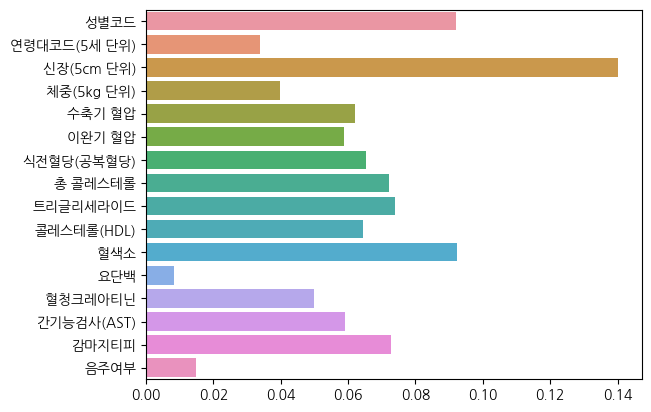

In [21]:
#피처의 중요도 추출
print(forest.feature_importances_)
sns.barplot(x=forest.feature_importances_, y=feature_names)

신장이 가장 중요하고 다음으로 성별코드와 혈색소가 중요한 특성으로 작용

In [22]:
#정확도 측정
print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 0.963
테스트 세트 정확도: 0.681


4-3.엑스트라 트리

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
et.fit(X_train, y_train)

y_predict = forest.predict(X_test) #예측

[0.21646043 0.02923952 0.05240533 0.0535842  0.05858748 0.05772678
 0.05923453 0.06031163 0.06661328 0.06010425 0.06614061 0.01256106
 0.05153579 0.05926149 0.06291702 0.03331661]


<Axes: >

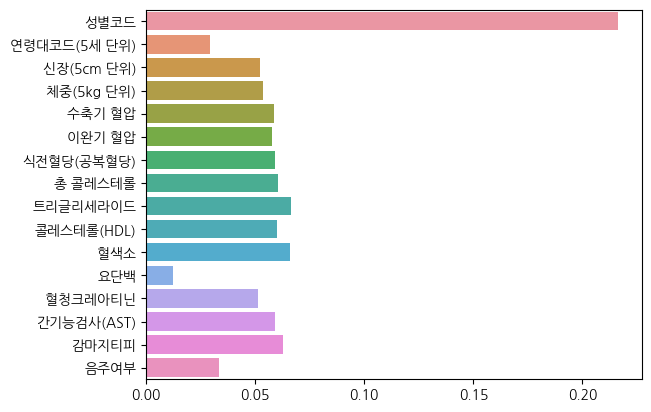

In [24]:
#피처의 중요도 추출
print(et.feature_importances_)
sns.barplot(x=et.feature_importances_, y=feature_names)

의사결정 트리와 비슷, 랜덤 포레스트와는 다른 양상

In [25]:
print("훈련 세트 정확도: {:.3f}".format(et.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(et.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.711


4-4. 그레이디언트 부스팅(GBM 회귀 트리)

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=42)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.722
테스트 세트 정확도: 0.719


4-5. 히스토그램 기반 그레이디언트 부스팅

In [27]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
hgb.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(hgb.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(hgb.score(X_test, y_test)))

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


훈련 세트 정확도: 0.731
테스트 세트 정확도: 0.721


4-6.에이다부스트(Adaboost)

In [28]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(random_state=42)
abc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(abc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(abc.score(X_test, y_test)))

훈련 세트 정확도: 0.715
테스트 세트 정확도: 0.714


4-7.배깅

5분 넘었는데도 결과값 안보임 (오래걸림)

In [29]:
#from sklearn.svm import SVC
#from sklearn.ensemble import BaggingClassifier

#estimator = SVC()
#bag = BaggingClassifier(base_estimator = estimator, random_state = 45)
#bag.fit(X_train, y_train)

#print("훈련 세트 정확도: {:.3f}".format(bag.score(X_train, y_train)))
#print("테스트 세트 정확도: {:.3f}".format(bag.score(X_test, y_test)))

GBM, hist_GBM가 가장 좋은 성능을 냄 
- 추가적으로 엑스트라 트리, 랜덤 포레스트도 진행
> 교차검증, 그리드 서치 진행

In [30]:
#GBM K-Fold교차검증
#from sklearn.model_selection import cross_validate
#res = cross_validate(gbrt, X_train, y_train, return_train_score=True)
#res

In [31]:
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_validate

#kfold = KFold(n_splits=5, shuffle = True, random_state=42)
#res = cross_validate(gbrt, X_train, y_train, cv=kfold)
#res

test 성능의 값이 유사하게 나옴 - 신뢰할만한 데이터셋?

In [32]:
#GBM 그리드 서치
#from sklearn.model_selection import GridSearchCV
#param = {
#    'n_estimators' : [90, 100, 500], #훈련횟수
#    'learning_rate' : [0.05, 0.01, 0.1] #학습률
#}
#gs = GridSearchCV(gbrt, param_grid=param, scoring='accuracy', cv=10, n_jobs=-1) #k-fold 교차검증 또한 수행함
#gs.fit(X_train, y_train)

#print(gs.best_score_)
#print(gs.best_params_)

In [33]:
#GBM 그리드 서치
from sklearn.model_selection import GridSearchCV
param = {
    'n_estimators' : [100, 300, 500], #훈련횟수(기본 100)
    #'max_depth': range(5, 20, 5),
    'learning_rate' : [0.01, 0.1, 0.3, 0.5] #학습률
}
gs = GridSearchCV(gbrt, param_grid=param, scoring='accuracy', cv=5, n_jobs=-1) #k-fold 교차검증 또한 수행함
gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

In [ ]:
from sklearn.model_selection import validation_curve

param_range = [1,2,3,4,5,6,7,8,9,10]  # 수정
train_scores, test_scores = validation_curve(estimator=gbrt, X=X_train, y=y_train, 
                param_name='GradientBoostingClassifier__max_depth', ## 수정
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_depth') # 수정
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth') # 수정
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.00])  # 수정
plt.tight_layout()
plt.show()

ValueError: Invalid parameter 'GradientBoostingClassifier' for estimator GradientBoostingClassifier(random_state=42). Valid parameters are: ['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'].

4-8. 서포트 벡터 머신(SVM)

스케일 조정이 필요함

In [ ]:
import sklearn.svm as svm
import sklearn.metrics as mt

# SVM, kernel = 'linear'로 선형분리 진행
svm_clf =svm.SVC(kernel = 'linear', random_state=42)
svm_clf.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(svm_clf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svm_clf.score(X_test, y_test)))

In [ ]:
# SVM, kernel = 'rbf'로 비선형분리 진행
svm_clf2 =svm.SVC(kernel = 'rbf')
svm_clf2.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(svm_clf2.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svm_clf2.score(X_test, y_test)))